In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

BASE = './rawdata/et/behavioral'

### Load Data

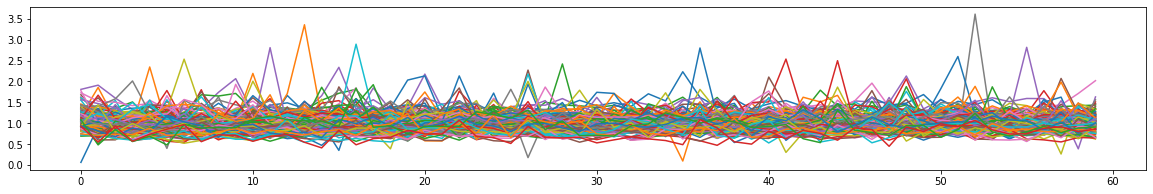

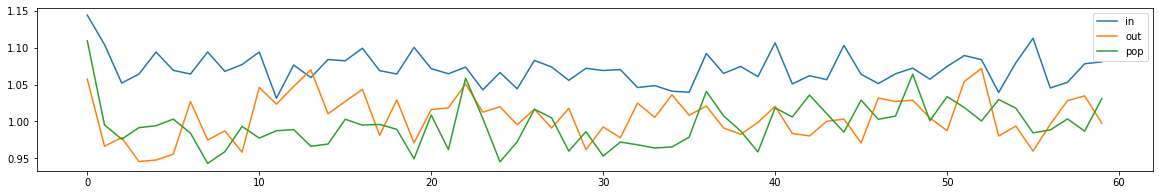

In [ ]:
data = []

plt.figure(figsize=(20, 3))
tct_in = np.zeros(60)
tct_out = np.zeros(60)
tct_pop = np.zeros(60)
for i in range(12):
  pid = 101 + i
  d = np.genfromtxt(f"{BASE}/S{pid}S.csv", delimiter=",").astype(float)
  dur = d[:,4]
  eas = d[:,5]

  for j in [0,1,2,3,4]:
    if j == 0:
      dd = d[(dur == 0)]
      start = dd[:,-1] == -1
      end = dd[:,-1] != -1

      tct = dd[end, 0] - dd[start, 0]
      width = dd[end, 3]
      err = 1 - dd[end, -1]
      data.append([pid, -1, -1, tct.mean(), err.mean(), width.mean()])
    else: 
      for k in [0, 1, 2]:
        dd = d[(dur == j) & (eas == k)]
        start = dd[:,-1] == -1
        end = dd[:,-1] != -1

        tct = dd[end, 0] - dd[start, 0]
        width = dd[end, 3]

        if k == 0: tct_in += tct
        elif k == 1: tct_out += tct
        elif k == 2: tct_pop += tct

        plt.plot(tct)
        err = 1 - dd[end, -1]
        data.append([pid, k, j, tct.mean(), err.mean(), width.mean()])

plt.show()

plt.figure(figsize=(20, 3))
plt.plot(tct_in/12/4, label="in")
plt.plot(tct_out/12/4, label="out")
plt.plot(tct_pop/12/4, label="pop")
plt.legend()
plt.show()

In [ ]:
output = pd.DataFrame(data, columns=["id", "easing", "duration", "tct", "err", "width"])
output = output[output['easing'] != -1]
output

,id,easing,duration,tct,err,width
1,101,0,1,1.080081,0.000000,50.000000
2,101,1,1,0.995968,0.000000,49.800000
3,101,2,1,1.062258,0.000000,50.000000
4,101,0,2,1.092642,0.000000,50.000000
5,101,1,2,1.019009,0.000000,49.983333
...,...,...,...,...,...,...
151,112,1,3,0.847778,0.016667,49.450000
152,112,2,3,0.962891,0.016667,50.000000
153,112,0,4,0.836107,0.000000,45.216667
154,112,1,4,0.928997,0.000000,49.633333


In [ ]:
output.to_csv("rt_err_width.csv")

In [ ]:
data = np.array(data)
pid = data[:,0].astype(int)
easing = data[:,1].astype(int)
duration = data[:,2].astype(int)
rt = data[:,3].astype(float)
err = data[:,4].astype(float)
width = data[:,5].astype(float)

## Plot

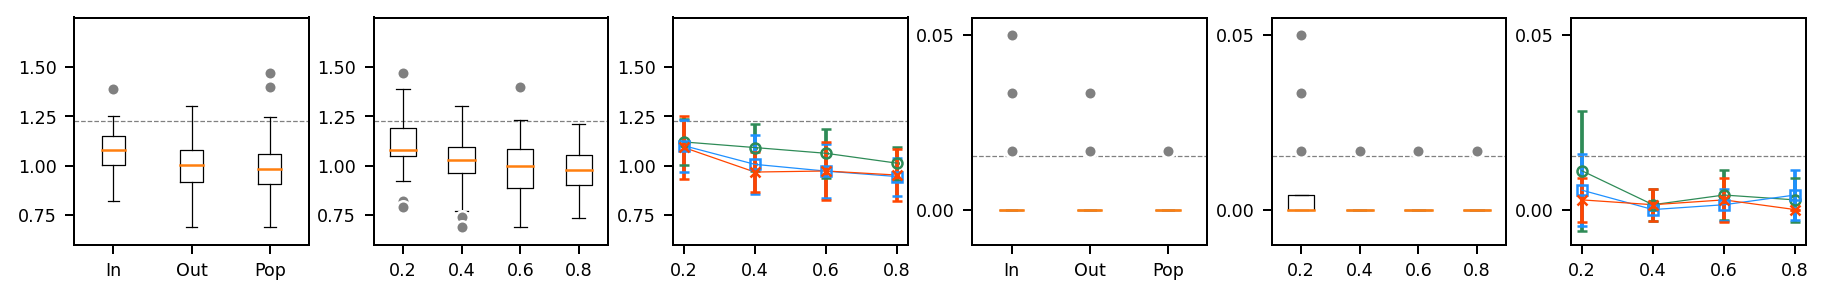

1.0712431331475576 0.11918796478763474
1.0057177375588153 0.14269982130461192
0.9957087856200006 0.14792313552967826


In [ ]:
colors = ['seagreen', 'dodgerblue', 'orangered']
labels = ['easing-in', 'easing-out', 'pop-up']
ms = ['o','s','x']

fig = plt.figure(figsize=(10, 1.5), dpi=180)
ax = fig.subplots(1, 6)
ax[0].axhline(y = rt[duration==-1].mean(), color = 'gray', linestyle = 'dashed', linewidth=0.5)
ax[0].boxplot([rt[easing==0], rt[easing==1], rt[easing==2]], 
                 boxprops=dict(linewidth=0.5), 
                 capprops=dict(linewidth=0.5), 
                 whiskerprops=dict(linewidth=0.5),
                 flierprops=dict(markersize=5, markerfacecolor='gray', markeredgecolor='white'))
ax[0].set_xticklabels(['In', 'Out', 'Pop'], fontsize=8)
ax[0].set_ylim(0.6, 1.75)
ax[0].set_yticks([0.75, 1, 1.25, 1.5])
# plt.title("Easing Type and Response Time")
# ax[0].set_ylabel("Task Completion Time", fontsize=7.5)
plt.setp(ax[0].get_yticklabels(), fontsize=7)
plt.setp(ax[0].get_xticklabels(), fontsize=7)


ax[1].axhline(y = rt[duration==-1].mean(), color = 'gray', linestyle = 'dashed', linewidth=0.5)
ax[1].boxplot([rt[duration==1], rt[duration==2], rt[duration==3],rt[duration==4]], 
                 boxprops=dict(linewidth=0.5), 
                 capprops=dict(linewidth=0.5), 
                 whiskerprops=dict(linewidth=0.5),
                 flierprops=dict(markersize=5, markerfacecolor='gray', markeredgecolor='white'))
ax[1].set_xticklabels([0.2, 0.4, 0.6, 0.8])
# plt.ylabel("Task Completion Time", fontsize=8)
ax[1].set_ylim(0.6, 1.75)
ax[1].set_yticks([0.75, 1, 1.25, 1.5])
plt.setp(ax[1].get_yticklabels(), fontsize=7)
plt.setp(ax[1].get_xticklabels(), fontsize=7)


### interaction
ax[2].axhline(y = rt[duration==-1].mean(), color = 'gray', linestyle = 'dashed', linewidth=0.5)
for i in range(3): # easing type
  means = []
  stds = []
  easing_rt = rt[easing==i]
  easing_duration = duration[easing==i]
  for j in range(1, 5): # duration
    means.append(np.mean(easing_rt[easing_duration==j]))
    stds.append(np.std(easing_rt[easing_duration==j]))
  ax[2].errorbar([1, 2, 3, 4], means, yerr=stds, fmt=ms[i], ms=4, mew=1,capsize=2, color=colors[i], fillstyle='none')
  ax[2].scatter([1, 2, 3, 4], means, label=labels[i], color=colors[i], s=1)
  ax[2].plot([1, 2, 3, 4], means, color=colors[i], linewidth=0.5)
plt.setp(ax[2].get_yticklabels(), fontsize=7)
plt.setp(ax[2].get_xticklabels(), fontsize=7)
ax[2].set_ylim(0.6, 1.75)
ax[2].set_yticks([0.75, 1, 1.25, 1.5])
ax[2].set_xticks([1,2,3,4])
ax[2].set_xticklabels([0.2, 0.4, 0.6, 0.8])



ax[3].axhline(y = err[duration==-1].mean(), color = 'gray', linestyle = 'dashed', linewidth=0.5)
ax[3].boxplot([err[easing==0], err[easing==1], err[easing==2]], 
                 boxprops=dict(linewidth=0.5), 
                 capprops=dict(linewidth=0.5), 
                 whiskerprops=dict(linewidth=0.5),
                 flierprops=dict(markersize=5, markerfacecolor='gray', markeredgecolor='white'))
ax[3].set_xticklabels(['In', 'Out', 'Pop'], fontsize=8)
ax[3].set_yticks([0, 0.05, 0.1])
ax[3].set_ylim(-0.01, 0.055)

plt.setp(ax[3].get_yticklabels(), fontsize=7)
plt.setp(ax[3].get_xticklabels(), fontsize=7)
# ax[2].set_ylabel("Error Rate", fontsize=7.5)

ax[4].axhline(y = err[duration==-1].mean(), color = 'gray', linestyle = 'dashed', linewidth=0.5)
ax[4].boxplot([err[duration==1], err[duration==2], err[duration==3], err[duration==4]], 
                 boxprops=dict(linewidth=0.5), 
                 capprops=dict(linewidth=0.5), 
                 whiskerprops=dict(linewidth=0.5),
                 flierprops=dict(markersize=5, markerfacecolor='gray', markeredgecolor='white'))
ax[4].set_xticklabels([0.2, 0.4, 0.6, 0.8])
ax[4].set_yticks([0, 0.05, 0.1])
ax[4].set_ylim(-0.01, 0.055)
plt.setp(ax[4].get_yticklabels(), fontsize=7)
plt.setp(ax[4].get_xticklabels(), fontsize=7)


### interaction
ax[5].axhline(y = err[duration==-1].mean(), color = 'gray', linestyle = 'dashed', linewidth=0.5)

for i in range(3): # easing type
  means = []
  stds = []
  easing_err = err[easing==i]
  easing_duration = duration[easing==i]
  for j in range(1, 5): # duration
    means.append(np.mean(easing_err[easing_duration==j]))
    stds.append(np.std(easing_err[easing_duration==j]))
  ax[5].errorbar([1, 2, 3, 4], means, yerr=stds, fmt=ms[i], ms=4, mew=1,capsize=2, color=colors[i], fillstyle='none')
  # ax[5].scatter([1, 2, 3, 4], means, label=labels[i], color=colors[i], s=1, marker=ms[i])
  ax[5].plot([1, 2, 3, 4], means, color=colors[i], linewidth=0.5)
ax[5].set_xticks([1,2,3,4])
ax[5].set_xticklabels([0.2, 0.4, 0.6, 0.8])
plt.setp(ax[5].get_yticklabels(), fontsize=7)
plt.setp(ax[5].get_xticklabels(), fontsize=7)
ax[5].set_yticks([0, 0.05, 0.1])
ax[5].set_ylim(-0.01, 0.055)

plt.tight_layout(pad=0.15)
plt.savefig("rt_err.svg")
plt.show()
print(rt[easing==0].mean(), rt[easing==0].std())
print(rt[easing==1].mean(), rt[easing==1].std())
print(rt[easing==2].mean(), rt[easing==2].std())

In 	 (M=47.711, SD=2.955)
Out 	 (M=49.380, SD=0.693)
Pop 	 (M=49.949, SD=0.198)
0.2 	 (M=48.923, SD=2.359)
0.4 	 (M=49.213, SD=1.657)
0.6 	 (M=49.306, SD=1.132)
0.8 	 (M=48.612, SD=2.461)
in
	 0.2	 (M=47.567, SD=3.536)
	 0.4	 (M=48.249, SD=2.532)
	 0.6	 (M=48.525, SD=1.585)
	 0.8	 (M=46.506, SD=3.328)
out
	 0.2	 (M=49.339, SD=1.096)
	 0.4	 (M=49.457, SD=0.515)
	 0.6	 (M=49.394, SD=0.482)
	 0.8	 (M=49.331, SD=0.462)
pop
	 0.2	 (M=49.864, SD=0.304)
	 0.4	 (M=49.932, SD=0.226)
	 0.6	 (M=50.000, SD=0.000)
	 0.8	 (M=50.000, SD=0.000)


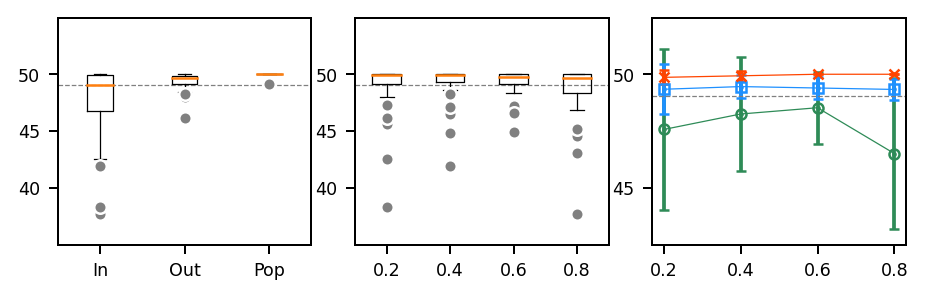

In [ ]:
colors = ['seagreen', 'dodgerblue', 'orangered']
labels = ['easing-in', 'easing-out', 'pop-up']
ms = ['o','s','x']


fig = plt.figure(figsize=(5, 1.5), dpi=180)
ax = fig.subplots(1, 3)
ax[0].axhline(y = width[duration==-1].mean(), color = 'gray', linestyle = 'dashed', linewidth=0.5)
ax[0].boxplot([width[easing==0], width[easing==1], width[easing==2]], 
                 boxprops=dict(linewidth=0.5), 
                 capprops=dict(linewidth=0.5), 
                 whiskerprops=dict(linewidth=0.5),
                 flierprops=dict(markersize=5, markerfacecolor='gray', markeredgecolor='white'))
ax[0].set_xticklabels(['In', 'Out', 'Pop'], fontsize=8)

print(f"In \t (M={width[easing==0].mean():.3f}, SD={width[easing==0].std():.3f})")
print(f"Out \t (M={width[easing==1].mean():.3f}, SD={width[easing==1].std():.3f})")
print(f"Pop \t (M={width[easing==2].mean():.3f}, SD={width[easing==2].std():.3f})")

ax[0].set_ylim(35, 55)
ax[0].set_yticks([40, 45, 50])
# plt.title("Easing Type and Response Time")
# ax[0].set_ylabel("Task Completion Time", fontsize=7.5)
plt.setp(ax[0].get_yticklabels(), fontsize=7)
plt.setp(ax[0].get_xticklabels(), fontsize=7)


ax[1].axhline(y = width[duration==-1].mean(), color = 'gray', linestyle = 'dashed', linewidth=0.5)
ax[1].boxplot([width[duration==1], width[duration==2], width[duration==3],width[duration==4]], 
                 boxprops=dict(linewidth=0.5), 
                 capprops=dict(linewidth=0.5), 
                 whiskerprops=dict(linewidth=0.5),
                 flierprops=dict(markersize=5, markerfacecolor='gray', markeredgecolor='white'))
ax[1].set_xticklabels([0.2, 0.4, 0.6, 0.8])
# plt.ylabel("Task Completion Time", fontsize=8)
ax[1].set_ylim(35, 55)
ax[1].set_yticks([40, 45, 50])
plt.setp(ax[1].get_yticklabels(), fontsize=7)
plt.setp(ax[1].get_xticklabels(), fontsize=7)

print(f"0.2 \t (M={width[duration==1].mean():.3f}, SD={width[duration==1].std():.3f})")
print(f"0.4 \t (M={width[duration==2].mean():.3f}, SD={width[duration==2].std():.3f})")
print(f"0.6 \t (M={width[duration==3].mean():.3f}, SD={width[duration==3].std():.3f})")
print(f"0.8 \t (M={width[duration==4].mean():.3f}, SD={width[duration==4].std():.3f})")


### interaction
ax[2].axhline(y = width[duration==-1].mean(), color = 'gray', linestyle = 'dashed', linewidth=0.5)
for i, e in enumerate(['in', 'out', 'pop']): # easing type
  means = []
  stds = []
  easing_width = width[easing==i]
  easing_duration = duration[easing==i]

  print(e)
  for j in range(1, 5): # duration
    means.append(np.mean(easing_width[easing_duration==j]))
    stds.append(np.std(easing_width[easing_duration==j]))
  for j, d in enumerate(['0.2', '0.4', '0.6', '0.8']):
    print(f"\t {d}\t (M={means[j]:.3f}, SD={stds[j]:.3f})")
  
  ax[2].errorbar([1, 2, 3, 4], means, yerr=stds, fmt=ms[i], ms=4, mew=1, capsize=2, fillstyle='none',color=colors[i])
  ax[2].scatter([1, 2, 3, 4], means, label=labels[i], color=colors[i], s=1, alpha=0.8)
  ax[2].plot([1, 2, 3, 4], means, color=colors[i], linewidth=0.5)
plt.setp(ax[2].get_yticklabels(), fontsize=7)
plt.setp(ax[2].get_xticklabels(), fontsize=7)
ax[2].set_ylim(42.5, 52.5)
ax[2].set_yticks([45, 50])
ax[2].set_xticks([1,2,3,4])
ax[2].set_xticklabels([0.2, 0.4, 0.6, 0.8])

plt.tight_layout(pad=0.15)
plt.savefig("width.svg")
plt.show()